## Sampling fot the Match Filter

In [1]:
#Libraries to import
using SerialPorts
using PyPlot
using FFTW 

In [ ]:
c = 343;          # Speed of sound in air in m/s
fs = 500000;       # This is the sample rate of the sonar.
dt = 1/fs;        # This is the sample spacing
r_max = 10;        # Maximum range in metres to which to simulate.
t_max = 2*r_max/c;

In [48]:
list_serialports() # show available ports
a = []
b = ""
i = 0

ser = SerialPort("COM3:", 9600) 

r = readavailable(ser)

# Start a conversion
write(ser, "c")

BytesAvailable = bytesavailable(ser)

while bytesavailable(ser) < 1
    continue 
end
# sleep(0.01)
r = readavailable(ser)

# Get the values
write(ser, "p") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end 

close(ser)

a=split(b, ("\r\n"))

println(length(a))

29979


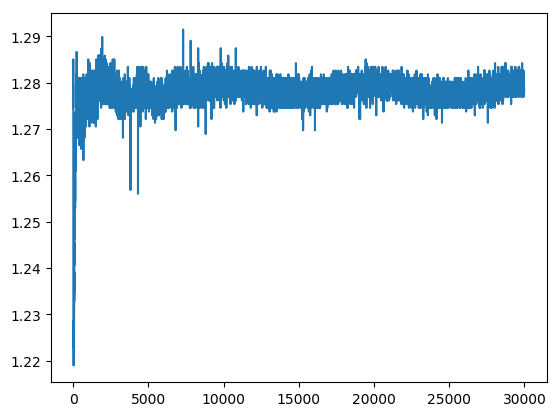

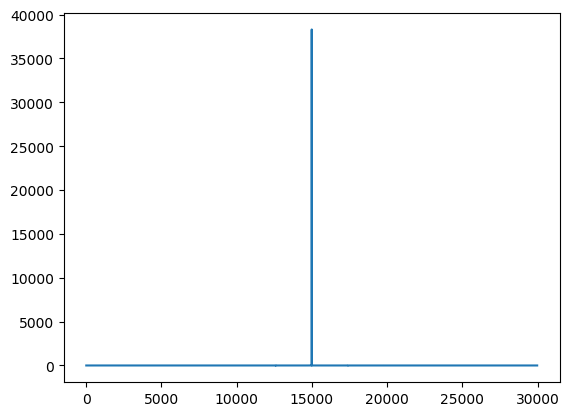

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000042A58B38>

In [49]:
ac = []
i=1

while (i<length(a)-1)
    if length(a[i])>5
        push!(ac,parse(Int,(a[i][1:4])))
        push!(ac,parse(Int,(a[i][5:8])))
    else    
        push!(ac,parse(Int,(a[i])))        
    end 
    i+=1
end

match = (3.3/4096).*ac
# print(match)
figure()
plot(match)
MATCH = abs.(fftshift(fft(match)));

figure()
plot(MATCH)

## Sampling the Echo 

In [81]:
list_serialports() # show available ports

y = []
b = ""
i = 0

ser = SerialPort("COM3:", 9600) 

r = readavailable(ser)

# Start a conversion
write(ser, "c")

while bytesavailable(ser) < 1
    continue 
end
sleep(0.05)
r = readavailable(ser)

# Get the values
write(ser, "p") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end 

close(ser)

y=split(b, ("\r\n"))

println(length(y))   


29979


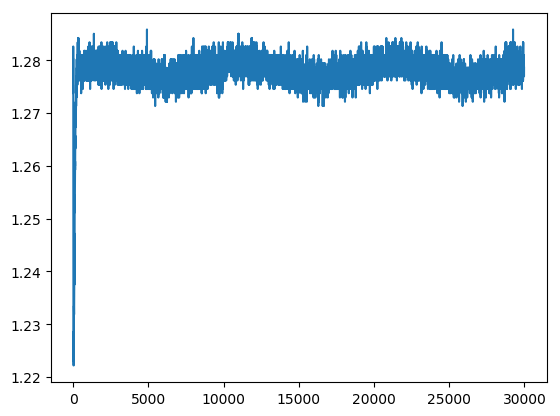

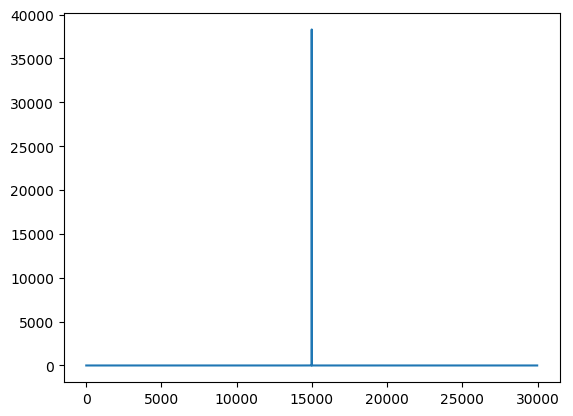

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000043F54A20>

In [82]:
rc = []
i=1

while (i<length(y)-1)
    if length(y[i])>5
        push!(rc,parse(Int,(y[i][1:4])))
        push!(rc,parse(Int,(y[i][5:8])))
    else    
        push!(rc,parse(Int,(y[i])))        
    end 
    i+=1
end

receive = (3.3/4096).*rc
# print(match)
figure()
plot(receive)
RECEIVE = abs.(fftshift(fft(receive)));

figure()
plot(RECEIVE)

## Matched Filtering

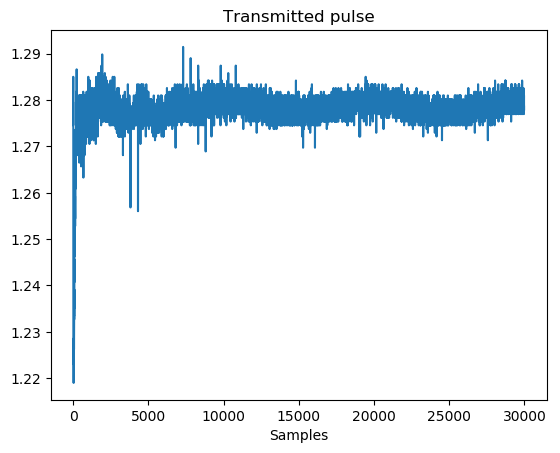

29978

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000440E4860>

In [83]:
v_tx = match

print(length(v_tx))
figure() # Create a new figure
title("Transmitted pulse")
xlabel("Samples")
plot(v_tx) # Basic plot, axis labeled in samples

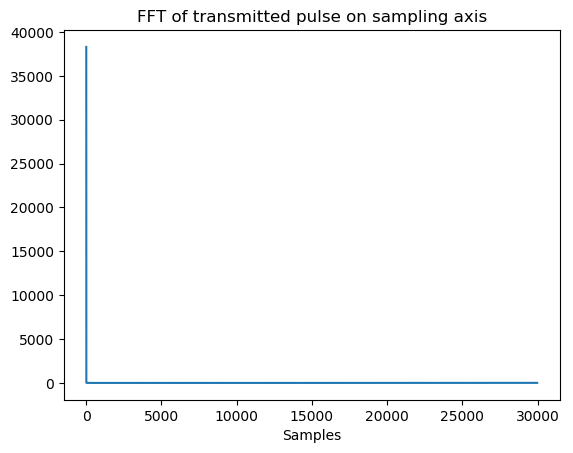

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000043F806D8>

In [84]:
#to see the freqeuncy domain use FFT function
V_TX = fft(v_tx);

figure()
title("FFT of transmitted pulse on sampling axis")
xlabel("Samples")
plot( abs.(V_TX) )

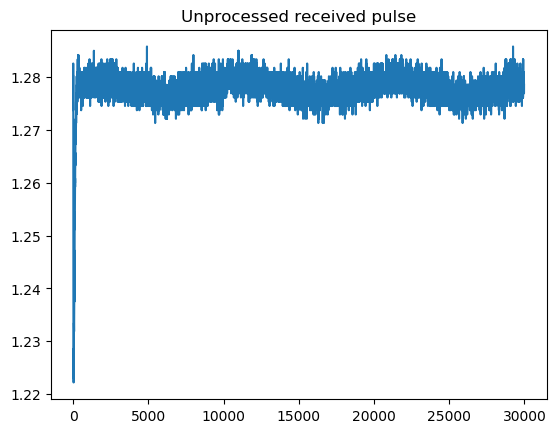

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000042C97F60>

In [85]:
v_rx = receive


figure() # Create a new figure
title("Unprocessed received pulse")
plot(v_rx) # Basic plot, axis labeled in samples

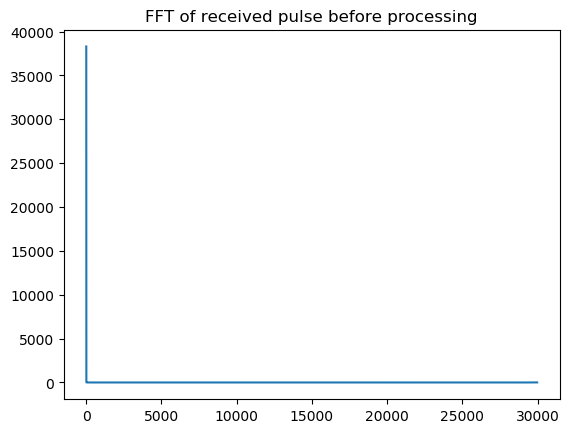

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000042F3BB00>

In [86]:
V_RX = fft(v_rx);

figure()
title("FFT of received pulse before processing")
plot( abs.(V_RX) )

## Matched Signal

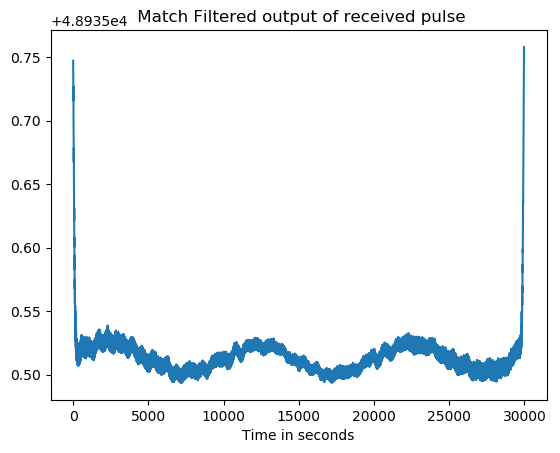

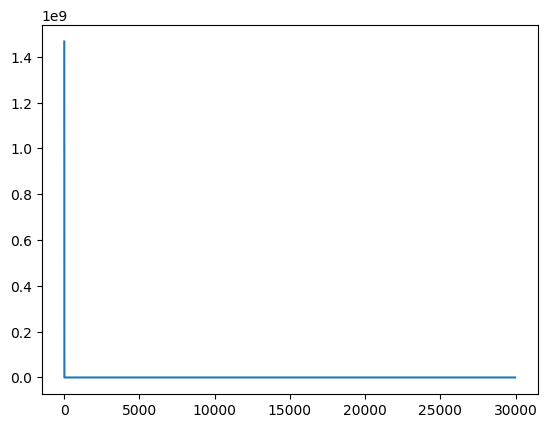

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000042CFD0F0>

In [87]:
H = conj( V_TX);

V_MF = H.*V_RX;
v_mf = ifft(V_MF);

figure() # Create a new figure
xlabel("Time in seconds")
title(" Match Filtered output of received pulse")
plot(v_mf) # Basic plot, axis labeled in samples

figure()
plot( abs.(V_MF) )

In [55]:
V_ANAL = 2*V_MF; # make a copy and double the values
N = length(V_MF);

V_ANAL = 2*V_MF; # make a copy and double the values

N = length(V_MF);

if mod(N,2)==0 # case N even
    neg_freq_range = Int(N/2):N; # Define range of “neg-freq” components
else # case N odd
    neg_freq_range = Int((N+1)/2):N;
end

V_ANAL[neg_freq_range] .= 0; # Zero out neg components in 2nd half of array.
v_anal = ifft(V_ANAL);

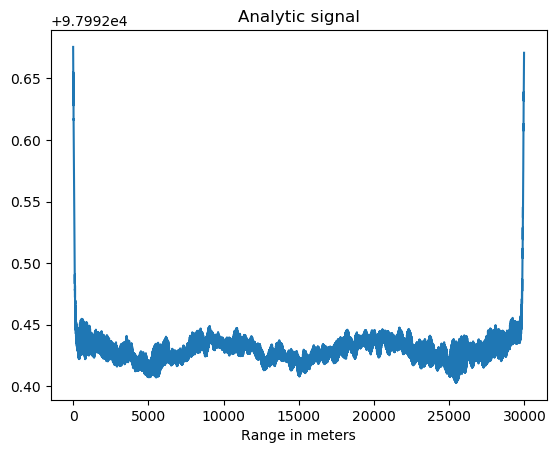

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000042EFBC18>

In [56]:
figure()
title("Analytic signal")
xlabel("Range in meters")
plot(abs.(v_anal))

In [ ]:
j=im; # Assign j as sqrt(-1) (“im” in julia)
v_bb = v_anal.*exp.(-j*2*pi*f0.*t);

In [ ]:
figure()
subplot(2,1,1)
plot(r,abs.(v_bb))
subplot(2,1,2)
plot(r,angle.(v_bb)) #query

In [ ]:
V_BB = fft(v_bb); 
figure()
plot(abs.(v_bb))